In [29]:
import os 
import random
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import gc
gc.collect()
import warnings
warnings.filterwarnings('ignore')

from copy import deepcopy
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn.functional as F


In [30]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


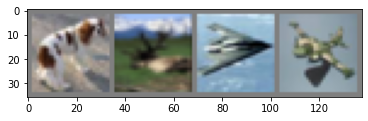

dog   deer  plane plane


In [31]:
def imshow(img):
    img = img/2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()

dataiter = iter(trainloader)
images,labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))


In [32]:
class TestNetWork(nn.Module):

    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,6,5,bias = False)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5,bias = False)
        self.fc1 = nn.Linear(16*5*5,120,bias = False)
        self.fc2 = nn.Linear(120,84,bias = False)
        self.fc3 = nn.Linear(84,10,bias = False)

    def forward(self,x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x,1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return x 


net = TestNetWork()

print(net.state_dict()['conv1.weight'][0])


tensor([[[ 5.1663e-02, -1.1448e-01, -1.1402e-01,  1.1004e-01,  1.1180e-01],
         [-6.8103e-02, -5.8245e-02, -9.9359e-02, -1.9270e-02, -1.0077e-01],
         [ 5.7757e-02, -4.8227e-02, -2.1663e-03, -9.1156e-03,  1.2240e-02],
         [-8.0026e-02,  2.4845e-02, -6.7240e-02,  3.1796e-02, -1.0668e-01],
         [ 7.9179e-02, -9.3377e-02,  8.9854e-02,  9.5539e-02, -3.8588e-02]],

        [[-8.7376e-02,  5.6377e-02,  5.8287e-02, -1.1304e-02, -3.0187e-02],
         [-8.1550e-02, -1.1470e-01,  1.3648e-02, -9.2048e-02,  1.0862e-01],
         [ 1.0734e-01,  5.2144e-02, -1.9127e-02, -7.3077e-02,  7.8681e-05],
         [ 8.9543e-02,  3.4793e-02, -2.8945e-02, -7.1733e-02,  6.5527e-02],
         [-3.0178e-02,  2.5088e-02,  3.4231e-02, -1.1122e-01,  7.9515e-03]],

        [[-2.0022e-03,  9.4430e-02,  7.6371e-02,  3.6739e-02, -2.7185e-02],
         [ 9.5102e-02, -7.6831e-02, -5.6349e-02, -6.4451e-02,  8.0443e-02],
         [-9.5444e-02,  3.6117e-02,  4.0511e-02, -1.0822e-01, -3.7481e-02],
        

In [33]:
parameters_name = []
for name, param in net.named_parameters():
    parameters_name.append(name)

print(parameters_name)



['conv1.weight', 'conv2.weight', 'fc1.weight', 'fc2.weight', 'fc3.weight']


In [34]:
def train(net,epochs,criterion,optimizer,trainloader):

   
    best_score = 0
    for epoch in range(epochs):

        running_loss = 0.0

        for i,data in enumerate(trainloader,0):

            input,labels = data
          
          
     

            optimizer.zero_grad()

            

            outputs = net(input)

            loss = criterion(outputs,labels)

            loss.backward()

            optimizer.step()

            

            running_loss += loss.item()
            
        

            if i % 2000 == 1999:
                print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
                
                
                running_loss = 0.0
        model_state = deepcopy(net)
        
        torch.save(model_state.state_dict(), f"{epoch}parameter.pth")
        
        score = test(net,criterion,optimizer,testloader)
        if (score>best_score):
            torch.save(model_state.state_dict(), "best_model.pth")
            best_score = score

                
    print("Finisehd traing")
    print(best_score)




def test(net,criterion,optimizer,testloader):

    correct = 0
    total = 0

    with torch.no_grad():

        for data in testloader:
            images,labels = data

            outputs = net(images)
            _,predicted = torch.max(outputs.data,1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct





In [35]:

epochs = 30
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr = 0.001,momentum = 0.9)




In [36]:

train(net,epochs,criterion,optimizer,trainloader)


[1,  2000] loss: 2.702
[1,  4000] loss: 1.794
[1,  6000] loss: 1.648
[1,  8000] loss: 1.587
[1, 10000] loss: 1.509
[1, 12000] loss: 1.461
[2,  2000] loss: 1.393
[2,  4000] loss: 1.365
[2,  6000] loss: 1.352
[2,  8000] loss: 1.340
[2, 10000] loss: 1.311
[2, 12000] loss: 1.313
[3,  2000] loss: 1.242
[3,  4000] loss: 1.230
[3,  6000] loss: 1.232
[3,  8000] loss: 1.243
[3, 10000] loss: 1.209
[3, 12000] loss: 1.220
[4,  2000] loss: 1.140
[4,  4000] loss: 1.132
[4,  6000] loss: 1.164
[4,  8000] loss: 1.151
[4, 10000] loss: 1.150
[4, 12000] loss: 1.152
[5,  2000] loss: 1.038
[5,  4000] loss: 1.088
[5,  6000] loss: 1.097
[5,  8000] loss: 1.087
[5, 10000] loss: 1.114
[5, 12000] loss: 1.108
[6,  2000] loss: 0.991
[6,  4000] loss: 1.043
[6,  6000] loss: 1.043
[6,  8000] loss: 1.024
[6, 10000] loss: 1.063
[6, 12000] loss: 1.074
[7,  2000] loss: 0.959
[7,  4000] loss: 0.980
[7,  6000] loss: 0.996
[7,  8000] loss: 0.999
[7, 10000] loss: 1.035
[7, 12000] loss: 1.038
[8,  2000] loss: 0.916
[8,  4000] 

In [37]:
model_list = []
for i in range(30):
    model = TestNetWork()
    b = f"{i}parameter.pth"
    model.load_state_dict(torch.load(b))
    model_list.append(model)


    

In [ ]:

# model0 = TestNetWork()
# model0.load_state_dict(torch.load("0parameter.pth"))


# model1 = TestNetWork()
# model1.load_state_dict(torch.load("1parameter.pth"))


# model2 = TestNetWork()
# model2.load_state_dict(torch.load("2parameter.pth"))


# model3 = TestNetWork()
# model3.load_state_dict(torch.load("3parameter.pth"))


# model4 = TestNetWork()
# model4.load_state_dict(torch.load("4parameter.pth"))


# model5 = TestNetWork()
# model5.load_state_dict(torch.load("5parameter.pth"))

# model6 = TestNetWork()
# model6.load_state_dict(torch.load("6parameter.pth"))

# model7 = TestNetWork()
# model7.load_state_dict(torch.load("7parameter.pth"))

# model8 = TestNetWork()
# model8.load_state_dict(torch.load("8parameter.pth"))

# model9 = TestNetWork()
# model9.load_state_dict(torch.load("9parameter.pth"))

# model_list = [model0,model1,model2,model3,model4,model5,model6,model7,model8,model9]

In [ ]:
# model0.state_dict().keys()
# params = {}
# for i in model0.state_dict().keys():
#     params[i] = 0
# print(params)
# print()

# for model in model_list:
#     for i in model0.state_dict().keys():
#         params[i] += model.state_dict()[i]

# for i in model0.state_dict().keys():
#     params[i] =  params[i]/10.0
# print(len(params))

{'conv1.weight': 0, 'conv2.weight': 0, 'fc1.weight': 0, 'fc2.weight': 0, 'fc3.weight': 0}

5


In [15]:
# class SoupNetwork(nn.Module):

#     def __init__(self):
#         super().__init__()
#         self.conv1 = nn.Conv2d(3,6,5)
#         self.conv1.weight.data = params['conv1.weight']
        
#         self.pool = nn.MaxPool2d(2,2)
        
#         self.conv2 = nn.Conv2d(6,16,5)
#         self.conv2.weight.data = params['conv2.weight']
        
#         self.fc1 = nn.Linear(16*5*5,120)
#         self.fc1.weight.data = params['fc1.weight']
        
#         self.fc2 = nn.Linear(120,84)
#         self.fc2.weight.data = params['fc2.weight']
        
#         self.fc3 = nn.Linear(84,10)
#         self.fc3.weight.data = params['fc3.weight']
    
#     def forward(self,x):
#         x = self.pool(F.relu(self.conv1(x)))
#         x = self.pool(F.relu(self.conv2(x)))
#         x = torch.flatten(x,1)
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         return x 


In [38]:
class GreedySoup(nn.Module):

    def __init__(self,params1):
        self.params1 = params1
        
        super().__init__()
        self.conv1 = nn.Conv2d(3,6,5)
        self.conv1.weight.data = self.params1['conv1.weight']
        
        self.pool = nn.MaxPool2d(2,2)
        
        self.conv2 = nn.Conv2d(6,16,5)
        self.conv2.weight.data = self.params1['conv2.weight']
        
        self.fc1 = nn.Linear(16*5*5,120)
        self.fc1.weight.data = self.params1['fc1.weight']
        
        self.fc2 = nn.Linear(120,84)
        self.fc2.weight.data = self.params1['fc2.weight']
        
        self.fc3 = nn.Linear(84,10)
        self.fc3.weight.data = self.params1['fc3.weight']
    
    def forward(self,x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x,1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return x 


In [20]:
# params = {}
# for i in model_list[0].state_dict().keys():

#     params[i] = 0
# base_network = GreedySoup(params1 = params)

In [40]:

params = {}


for i in model_list[0].state_dict().keys():

    params[i] = 0

cnt = 1
for i in range(len(model_list)):

    if (i == 0):
        for j in model_list[0].state_dict().keys():
            params[j] += model_list[0].state_dict()[j]
                   
        base_network = GreedySoup(params1 = params)
        cnt += 1
            
    
    else:
        
        score_before = test(base_network,criterion,optimizer,testloader)
        params1 = {}
        for j in model_list[0].state_dict().keys():
            params1[j] = 0
        for k in model_list[0].state_dict().keys():
             params1[k] = (base_network.state_dict()[k]*(cnt-1) + model_list[i].state_dict()[k])/cnt
        new_network = GreedySoup(params1 = params1)
        
        after_score = test(new_network,criterion,optimizer,testloader)

        if(after_score > score_before):

            base_model = new_network
        cnt += 1







In [43]:
a = test(new_network,criterion,optimizer,testloader)/10000

In [44]:
print(a*100,end = '')
print("%")

50.07%
